In [53]:
import pandas as pd
import numpy as np

## Read the data

In [54]:
# skiprows=1, header=None to ignore
df = pd.read_csv('dat.csv', header=0)
target_col = "re.admission.within.6.months"

In [55]:
#double check for target column

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataframe columns.")

target_series = df[target_col]

## Remove non-numeric data

In [56]:
numeric_df = df.select_dtypes(include=[np.number])

if target_col not in numeric_df.columns:
    numeric_df[target_col] = target_series

## Remove columns with missingness greater than 30%

In [57]:
thresh = 0.3 # missingness threshold

In [58]:
# percentage missingness of each column
missing_percentages = numeric_df.isnull().mean()

In [59]:
cols_to_drop = [
    col for col in numeric_df.columns
    if col != target_col and missing_percentages[col] > thresh
]

In [60]:
# dropping the columns
numeric_df.drop(columns=cols_to_drop, inplace=True)

In [61]:
df_preprocessed = numeric_df
print("Preprocessed DataFrame shape:", df_preprocessed.shape)
print("Preprocessed DataFrame columns:", df_preprocessed.columns.tolist())

Preprocessed DataFrame shape: (2008, 108)
Preprocessed DataFrame columns: ['Unnamed: 0', 'inpatient.number', 'visit.times', 'body.temperature', 'pulse', 'respiration', 'systolic.blood.pressure', 'diastolic.blood.pressure', 'map', 'weight', 'height', 'BMI', 'myocardial.infarction', 'congestive.heart.failure', 'peripheral.vascular.disease', 'cerebrovascular.disease', 'dementia', 'Chronic.obstructive.pulmonary.disease', 'connective.tissue.disease', 'peptic.ulcer.disease', 'diabetes', 'moderate.to.severe.chronic.kidney.disease', 'hemiplegia', 'leukemia', 'malignant.lymphoma', 'solid.tumor', 'liver.disease', 'AIDS', 'CCI.score', 'eye.opening', 'verbal.response', 'movement', 'fio2', 'acute.renal.failure', 'death.within.28.days', 're.admission.within.28.days', 'death.within.3.months', 're.admission.within.3.months', 'death.within.6.months', 're.admission.within.6.months', 'return.to.emergency.department.within.6.months', 'creatinine.enzymatic.method', 'urea', 'uric.acid', 'glomerular.filtrati

## Checking the correlation
"both numerical and categorical. Since we want to evaluate whether a missing value imputation model can understand complex correlations in medical datasets, we only kept numerical variables that are highly correlated. Moreover, since many features had missing values, we choose to drop columns with more than 30% missingness. After this procedure, we ended up with a dataset of 39 numerical features, such as systolic blood pressure and weight. Our target variable was readmission within 6 months." (PSYCHOGYIOS et al., 2023)

In [62]:
index_col = df_preprocessed.columns[0]

In [63]:
corr_with_target = df_preprocessed.corr(numeric_only=True)[target_col].abs().sort_values(ascending=False)

In [64]:
if target_col in corr_with_target.index:
    corr_with_target = corr_with_target.drop(labels=[target_col])

In [65]:
top_39_cols = corr_with_target.head(39).index.tolist()

In [66]:
final_cols_ordered = list(dict.fromkeys([index_col, target_col] + top_39_cols))

df_final = df_preprocessed[final_cols_ordered]

print("Final shape:", df_final.shape)
print("Columns retained:", df_final.columns.tolist())


Final shape: (2008, 40)
Columns retained: ['Unnamed: 0', 're.admission.within.6.months', 'return.to.emergency.department.within.6.months', 're.admission.within.3.months', 're.admission.within.28.days', 'death.within.6.months', 'death.within.3.months', 'dischargeDay', 'death.within.28.days', 'uric.acid', 'glomerular.filtration.rate', 'moderate.to.severe.chronic.kidney.disease', 'basophil.ratio', 'diabetes', 'CCI.score', 'systolic.blood.pressure', 'sodium', 'standard.deviation.of.red.blood.cell.distribution.width', 'D.dimer', 'basophil.count', 'prothrombin.activity', 'red.blood.cell', 'calcium', 'map', 'urea', 'dementia', 'cholesterol', 'potassium', 'cystatin', 'low.density.lipoprotein.cholesterol', 'eye.opening', 'visit.times', 'creatinine.enzymatic.method', 'hematocrit', 'GCS', 'coefficient.of.variation.of.red.blood.cell.distribution.width', 'verbal.response', 'fio2', 'eosinophil.ratio', 'high.sensitivity.troponin']


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

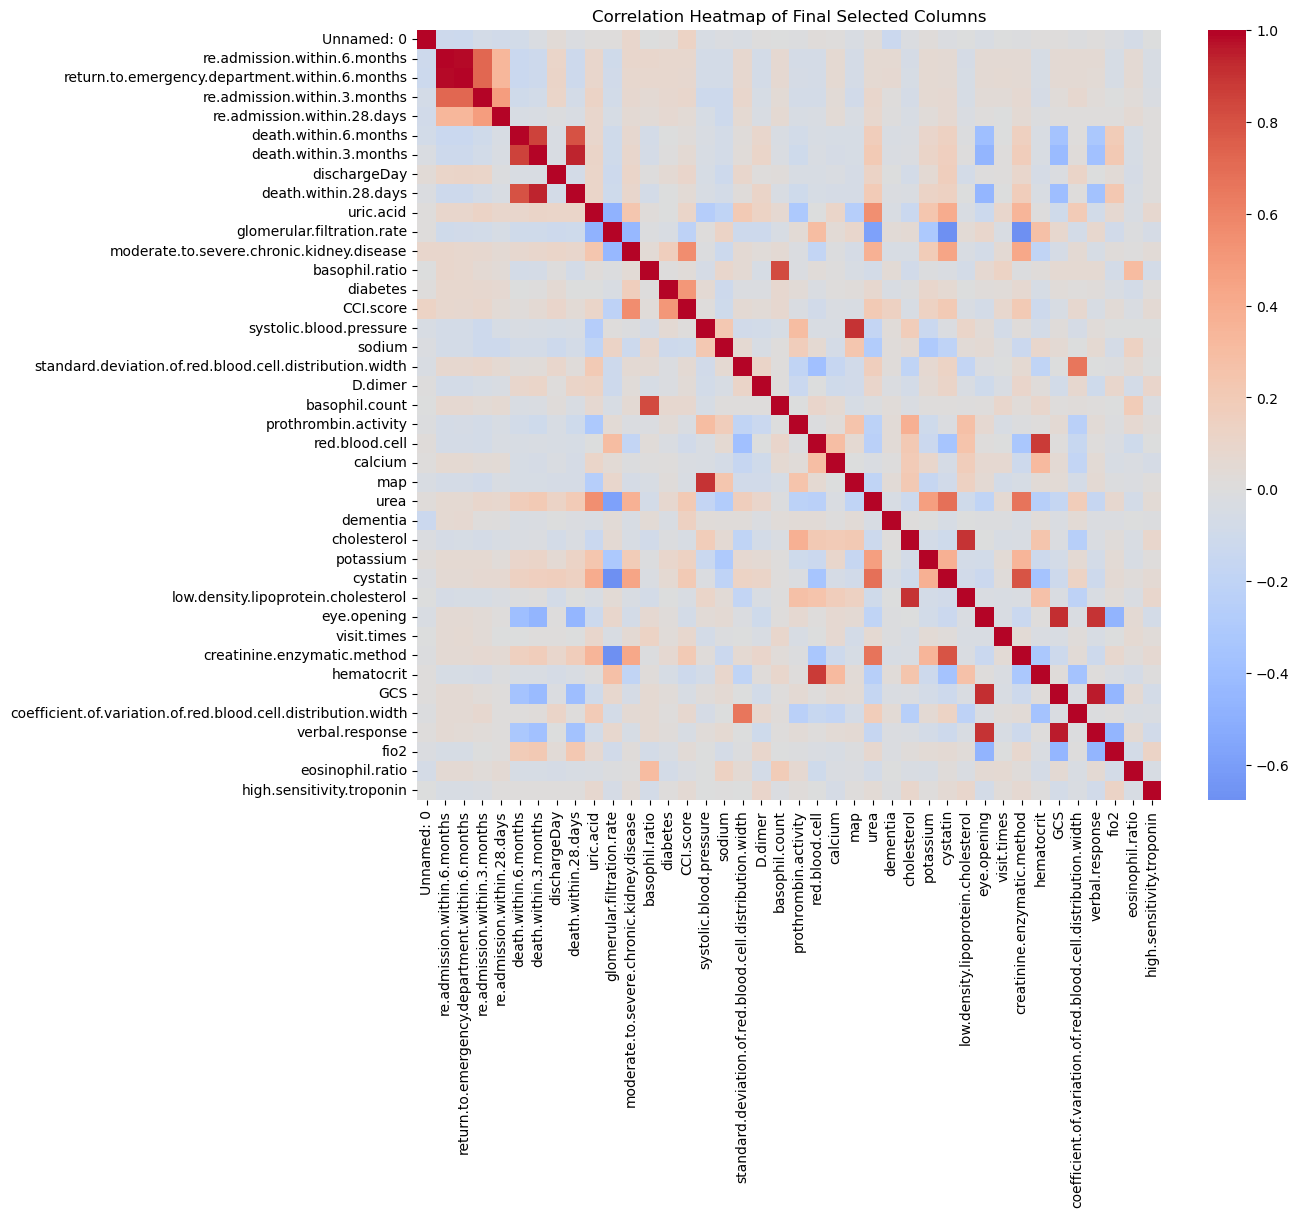

In [68]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    df_final.corr(numeric_only=True),  # correlation of final columns
    annot=False,                       # if you want correlation values on each cell, set to True
    cmap='coolwarm',                   # color map
    center=0
)
plt.title("Correlation Heatmap of Final Selected Columns")
plt.show()

In [69]:
df_final.to_csv("physionet_final_data.csv", index=False)